In [1]:
#import my tool and stock information of FB
import sys
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
data = pd.read_csv('./FB.csv', encoding = 'big5')

In [2]:
from scipy.stats import norm

In [3]:
import math

In [4]:
#cdf and inverse cdf of normal distribution
print (norm.cdf(1.96))
print (norm.ppf(0.975))

0.9750021048517795
1.959963984540054


In [5]:
#transfer my data into a matrix
data = data.to_numpy().tolist()

In [6]:
##date,open,high,low,close,adj close,volume
data

[['2019-07-09',
  194.970001,
  199.46000700000002,
  194.889999,
  199.21000700000002,
  199.21000700000002,
  14698600],
 ['2019-07-10',
  200.0,
  202.96000700000002,
  199.669998,
  202.729996,
  202.729996,
  20571700],
 ['2019-07-11',
  203.259995,
  203.800003,
  200.21000700000002,
  201.229996,
  201.229996,
  13678500],
 ['2019-07-12',
  199.679993,
  205.300003,
  199.16000400000001,
  204.869995,
  204.869995,
  15366300],
 ['2019-07-15',
  204.25,
  205.330002,
  201.820007,
  203.91000400000001,
  203.91000400000001,
  16030300],
 ['2019-07-16',
  203.889999,
  205.470001,
  203.100006,
  203.83999599999999,
  203.83999599999999,
  12132700],
 ['2019-07-17',
  204.179993,
  204.360001,
  201.58999599999999,
  201.800003,
  201.800003,
  12083700],
 ['2019-07-18',
  200.149994,
  202.470001,
  199.380005,
  200.779999,
  200.779999,
  11956600],
 ['2019-07-19',
  202.179993,
  202.330002,
  198.070007,
  198.360001,
  198.360001,
  12098300],
 ['2019-07-22',
  199.91000400

In [7]:
#test
data[2][4]
data[3][4]

204.869995

In [8]:
#i am confused:
#A=[[0,1,2],[3,4,5],[6,7,8]]
#A[1-1][3-1]=2

In [9]:
#get array: close price, ups and downs ratio within days
size = int (np.size(data)/7)
print ('size = %i' % size)
close = [0 for i in range(500)]
ratio = [0 for i in range(500)]
for i in range(0,size,1):
    close[i] = data[i][4]
for i in range(1,size-1,1):
    ratio[i] = close[i] / close[i-1] - 1
mean = np.mean(ratio[1:size-1])
var = np.var(ratio[1:size-1])
std = np.sqrt(var)
print (close[0:5])
print (ratio[0:5])
print (max(close))
print (min(close))
print (max(ratio))
print (min(ratio))
print ('mean = %f' % mean)
print ('var = %f' % var)
print ('std = %f' % std)

size = 253
[199.21000700000002, 202.729996, 201.229996, 204.869995, 203.91000400000001]
[0, 0.017669739853982236, -0.007399003746835775, 0.01808874955202988, -0.004685854558643232]
243.580002
0
0.10234995725804397
-0.14252997499723974
mean = 0.001087
var = 0.000653
std = 0.025556


In [10]:
#test 

simulate = [[0]*2 for i in range(3)]
print (simulate)

[[0, 0], [0, 0], [0, 0]]


In [11]:
#making Markov matrix
#category 0:<-10% 1:-9%~-10% 100: -1%~0% 20:+9%~+10% 21:>10%
ratio_divided = [0 for i in range(10)]
#mean + norm.ppf(0.9)
big_matrix = [[0]*10 for i in range(10)]
for i in range(1,size-2,1):
    for j in range(1,11,1):
        if (ratio[i] < mean + norm.ppf(j/10)*std):
            a = j-1
            break
    for k in range(1,11,1):
        if (ratio[i+1] < mean + norm.ppf(k/10)*std):
            b = k-1
            break
    big_matrix[a][b] += 1
#ratio = -0.0175 => -1.75% => category 8
print (np.sum(big_matrix))
print (big_matrix)

250
[[2, 1, 1, 1, 0, 1, 2, 5, 2, 4], [2, 0, 1, 1, 0, 0, 2, 3, 0, 3], [1, 4, 2, 3, 3, 5, 3, 3, 2, 1], [2, 2, 5, 1, 5, 2, 1, 4, 2, 1], [0, 0, 5, 7, 5, 3, 5, 5, 3, 0], [3, 3, 5, 2, 7, 9, 7, 5, 2, 0], [1, 0, 3, 2, 6, 8, 4, 3, 2, 0], [3, 0, 2, 4, 6, 8, 5, 2, 3, 1], [2, 0, 2, 3, 1, 6, 0, 1, 0, 1], [3, 2, 1, 1, 0, 2, 0, 2, 0, 1]]


In [12]:
#simulate the future stock price
#we have:day 252 close price,ratio. Try to simulate day 253 stock price. And day 254,...
for i in range(size,500,1):
    for j in range(1,11,1):
        if (ratio[i-1] < mean + norm.ppf(j/10)*std):
            a = j-1
            break
    rd = np.random.uniform(0,sum(big_matrix[a]))
    for k in range(0,10,1):
        if (rd > 0):
            rd -= big_matrix[a][k]
        if (rd <= 0):
            cat = k
            break
    rd_std = np.random.uniform(cat/10,cat/10 + 0.1)
    rd_ratio = mean + norm.ppf(rd_std)*std
    ratio[i] = rd_ratio
    close[i] = close[i-1] + close[i-1]*ratio[i]


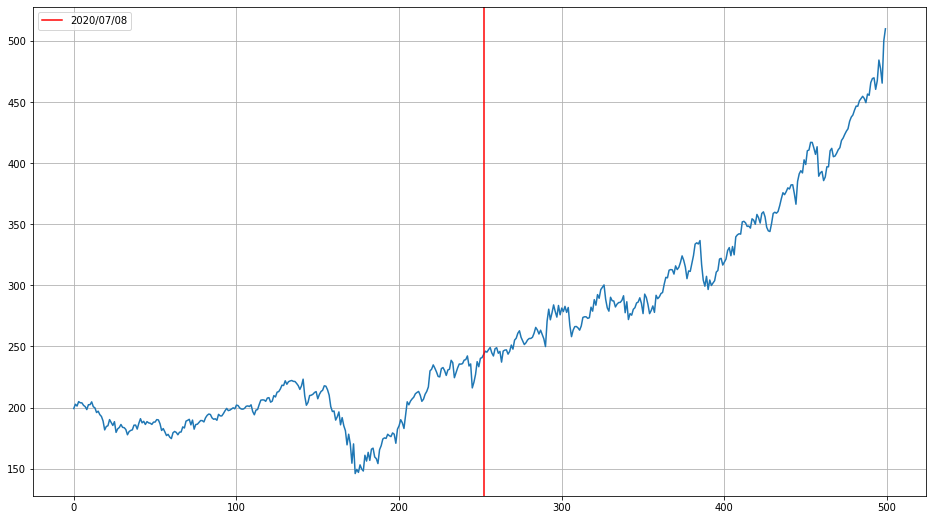

In [13]:
# plot
plt.figure(figsize=(16, 9))
x_range = np.arange(size, 500, 1)
plt.plot(close)
plt.axvline(x=size-1,color='r',label='2020/07/08')
plt.gca().legend()
plt.grid()
plt.show()

In [14]:
# do the simulation 100 times!
simulate = [[0]*500 for i in range(100)]

for s in range(0,100,1):
    for t in range(0,size,1):
        simulate[s][t] = close[t]
    for i in range(size,500,1):
        for j in range(1,11,1):
            if (ratio[i-1] < mean + norm.ppf(j/10)*std):
                a = j-1
                break
        rd = np.random.uniform(0,sum(big_matrix[a]))
        for k in range(0,10,1):
            if (rd > 0):
                rd -= big_matrix[a][k]
            if (rd <= 0):
                cat = k
                break
        rd_std = np.random.uniform(cat/10,cat/10 + 0.1)
        rd_ratio = mean + norm.ppf(rd_std)*std
        ratio[i] = rd_ratio
        simulate[s][i] = simulate[s][i-1] + simulate[s][i-1]*ratio[i]
        


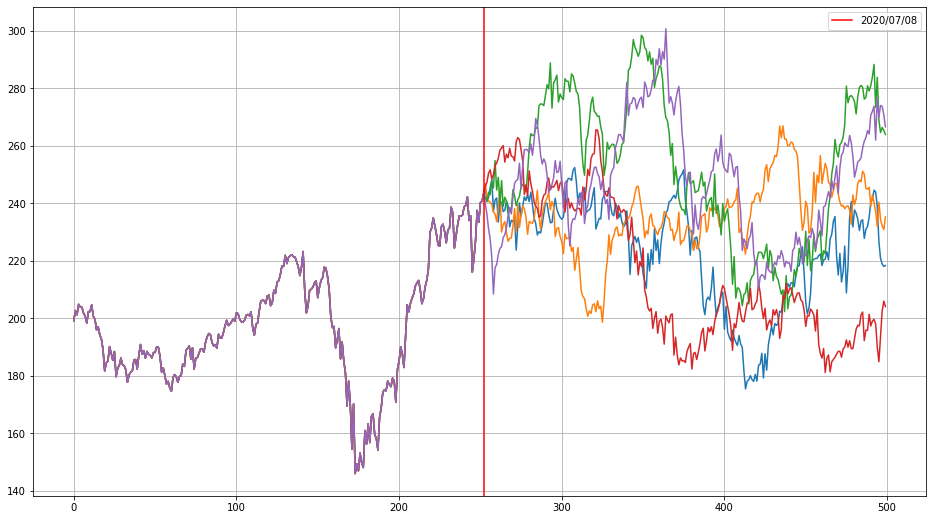

In [15]:
# plot
plt.figure(figsize=(16, 9))
x_range = np.arange(0, 500, 1)
for i in range(0,5,1):
    plt.plot(simulate[i])
plt.axvline(x=size-1,color='r',label='2020/07/08')
plt.gca().legend()
plt.grid()
plt.show()

In [16]:
pr_20 = [0 for i in range(500)]
pr_40 = [0 for i in range(500)]
pr_50 = [0 for i in range(500)]
pr_60 = [0 for i in range(500)]
pr_80 = [0 for i in range(500)]
avg = [0 for i in range(500)]
for i in range(0,size,1):
    pr_20[i] = close[i]
    pr_40[i] = close[i]
    pr_50[i] = close[i]
    pr_60[i] = close[i]
    pr_80[i] = close[i]
    avg[i] = close[i]
for i in range(size,500,1):
    day = [0 for i in range(100)]
    for j in range(0,100,1):
        day[j] = simulate[j][i]
        ##day.sort()
        sorted_day = sorted(day)
    pr_20[i] = sorted_day[20]
    pr_40[i] = sorted_day[40]
    pr_50[i] = sorted_day[50]
    pr_60[i] = sorted_day[60]
    pr_80[i] = sorted_day[80]
    avg[i] = sum(sorted_day)/100

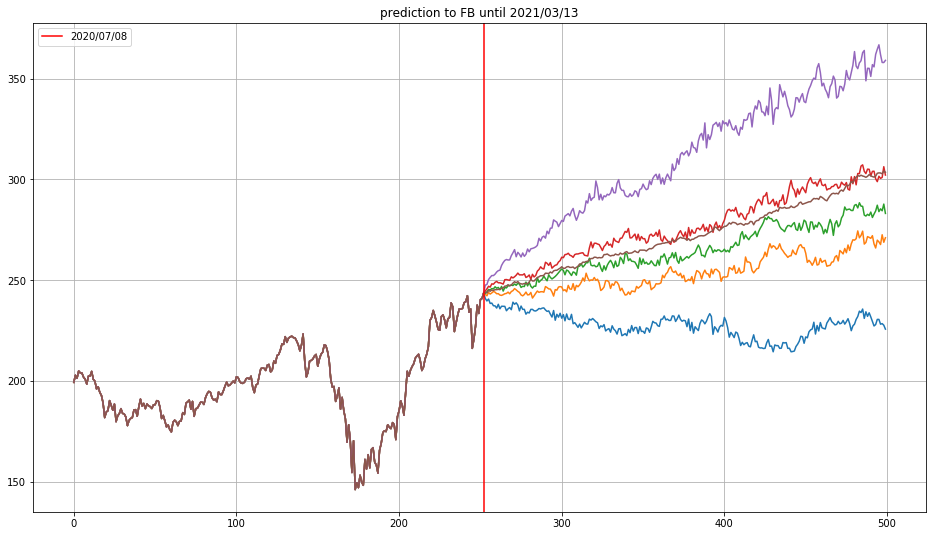

In [17]:
# plot
plt.figure(figsize=(16, 9))
x_range = np.arange(0, 500, 1)

plt.plot(pr_20)
plt.plot(pr_40)
plt.plot(pr_50)
plt.plot(pr_60)
plt.plot(pr_80)
plt.plot(avg)
plt.title(r'prediction to FB until 2021/03/13')
plt.axvline(x=size-1,color='r',label='2020/07/08')
plt.gca().legend()
plt.grid()
plt.show()

The goal is to optimize our investment strategy. 

First we try some simple strategy(two variable): Long 1 share of FB equity at 2020/07/06(worth \$243.58), if the stock price goes over x, or it downs below y,  we sell our asset!

Otherwise, we sell at 2021/03/13.

To make this simple, we set the inverse of elasticity of substitution be 0.1%(in one day).

( \\$1 Today worth \$1.001 Tomorrow )

And we seek to optimize $E(r)-0.01Var(r)$ where r is return ratio of investment.

The initial value of x = 270, y = 230

In [18]:
#y=sell price
x = 270
y = 230
r = [0 for i in range(100)]
for i in range(0,100,1):
    for j in range(size,500,1):
        z = simulate[i][499]
        day = 500
        if (simulate[i][j] > x or simulate[i][j] < y):
            z = simulate[i][j]
            day = j+1
            break
    r[i] = (z/math.pow(1.001,day-size))/close[size-1] - 1
E_r = np.mean(r)
Var_r = np.var(r)
utility = E_r - 0.01 * Var_r
print(E_r)
print(Var_r)
print(utility)

-0.005324861413063693
0.008068261056596087
-0.005405544023629654


we get the utility on strategy: x=270,y=230

In [19]:
#y=sell price
r = [0 for i in range(100)]
for i in range(0,100,1):
    z = simulate[i][499]
    r[i] = (z/math.pow(1.001,500-size))/close[size-1] - 1
E_r = np.mean(r)
Var_r = np.var(r)
utility = E_r - 0.01 * Var_r
print(E_r)
print(Var_r)
print(utility)

-0.026575168504958276
0.10193027820724412
-0.027594471287030718


To making a control group, compute the utility if we always sell the asset at 2021/03/13 no matter what happened.

In [20]:
def calculating_utility(x,y):
    r = [0 for i in range(100)]
    for i in range(0,100,1):
        for j in range(size,500,1):
            z = simulate[i][499]
            day = 500
            if (simulate[i][j] > x or simulate[i][j] < y):
                z = simulate[i][j]
                day = j+1
                break
        r[i] = (z/math.pow(1.001,day-size))/close[size-1] - 1
    E_r = np.mean(r)
    Var_r = np.var(r)
    utility = E_r - 0.01 * Var_r
    return utility

In [26]:
learning_times = 1000
x = 270
y = 230
for k in range(0,learning_times,1):
    alpha = calculating_utility(x+1,y)-calculating_utility(x,y)
    beta = calculating_utility(x,y+1)-calculating_utility(x,y)
    x += 1000 * alpha
    y += 1000 * beta

print(x)
print(y)
print(calculating_utility(x,y))

251.8278717660289
215.59935174152477
0.004991419745338162


In [28]:
max_utility = -1
for x in range(250,290,1):
    for y in range(210,250,1):
        if (max_utility < calculating_utility(x,y)):
            max_utility = calculating_utility(x,y)
print(x,y,max_utility)

289 249 0.008734274361044977
